# Dive into Deep Learning

References:
- https://d2l.ai/
- https://www.noonereadsanymore.com/posts/anatomy-of-a-neural-network

## 1.1 Deep Learning Fundamentals

### 1.1.1 What is Deep learning

### 1.1.2 Types of Learning

- Supervised Learning (Labeled data)
- Unsupervised Learning (Unstructured data)
- Reinforcement Learning
- Transfer Learning (Take what a model have learning and transfer it to another model)

### 1.1.3 Neural Networks

Anatomy of Netural Networks

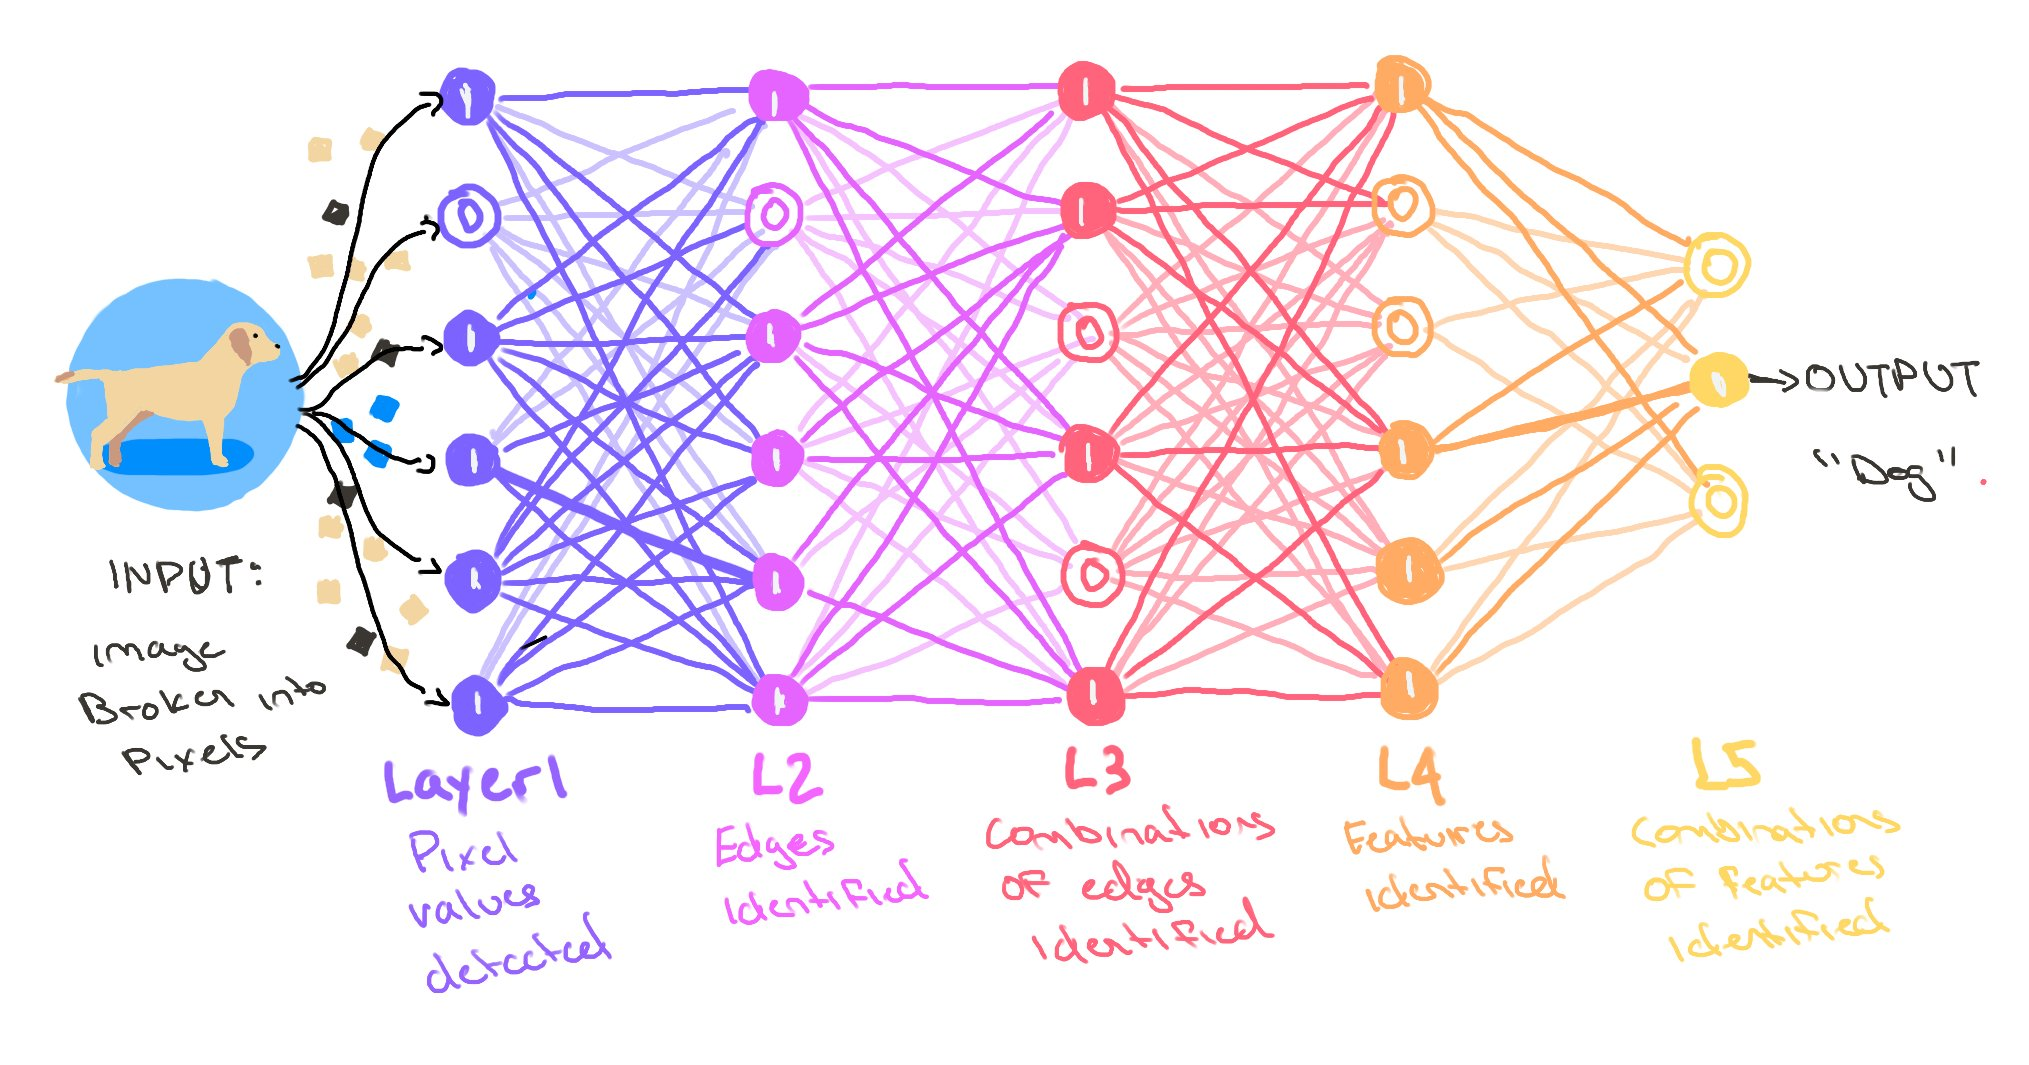

Input Layers | Hidden Layers | Output Layer

#### Neural networks workflow

Inputs (Images, texts, videos, audios) -> Numerical Encoding -> Neural Network: Learn representation (Patterns/Features/Weights) -> Representation Outputs (Embeddings/Encoded Output) -> Outputs (Decoded)

## 2.1 Data Manipulation

### 2.1.1 Getting started with PyTorch

The `tensor` is equivalent to `ndarrays` of Numpy with a few killer features added. First, the `tensor` class supports automatic differentiation. Second, it leverages GPUs to accelerate numerical computation, whereas NumPy only runs on CPUs. These properties make Neural Networks both easy to code and fast to run.

In [1]:
import torch

A `tensor` is the representation of (a possibly multidimensional) array of numerical values. In the one-dimensional case, i.e., when only one axis is needed for the data, a tensor is called a `vector`.

PyTorch provides a variety of functions for creating new tensors prepopulated with values. Unless otherwise specified, new tensors are stored in main memory and designated for CPU-based computation.

In [2]:
x = torch.arange(12, dtype=torch.float32)

In [3]:
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

Each of these values is called an `element` of the tensor. To inspect the total number of elements in a tensor, we call the `numel` method.

In [4]:
x.numel()

12

We can check the shape of a tensor by calling the `.shape` method.

In [5]:
x.shape

torch.Size([12])

We can change the shape of a tensor without altering its size or values, by invoking `.reshape`. This will create a new tensor retaining all the elements of the object reshaped configuring them into a matrix. Notice that the elements of the vector are laid out one row at a time and thus `x[3] == X[0, 3]`

In [8]:
X = x.reshape(3, 4)

In [9]:
X.shape

torch.Size([3, 4])

In [10]:
x[3] == X[0, 3]

tensor(True)

In [11]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

Given a tensor of size $n$ and target shape $(h, w)$, we know that $w = n /h$. To _automatically infer_ one component of the shape, we can place $a-1$ for the shape component that should be inferred automatically. In our case, instead of calling `x.reshape(3, 4)`, we could have equivalently called `x.reshape(-1, 4)` or `x.reshape(3, -1)`

In [13]:
x.reshape(-1, 4)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [14]:
x.reshape(3, -1)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

We often need to work with tensors initialized to contain all 0s or 1s. We can construct a tensor with all elements set to 0 and a shape of (2, 3, 4) via `zeros` function

In [15]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Similarly, we can create a tensor with all 1s by invoke `ones` function.

In [16]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

We also often wish to sample each element randomly (and independently) from a give probability distribution. For example, the parameters of neural networks are often initialized randomly. The following _snippet_ creates a tensor with elements drawn from a standard Gaussian (normal) distribution with _mean_ 0 and _standard deviation_ 1.

In [20]:
t = torch.randn(3, 4)

In [22]:
t.mean()

tensor(0.0250)

In [23]:
t.std()

tensor(1.2105)

We can also construct tensors by supplying the exact values for each element by supplying the exact values for each element passing a python list containing numerical literals.

In [24]:
torch.tensor([[1,2,3,4], [5,6,7,8], [9, 10, 11, 12], [13, 14,15, 16]])

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])

### 2.1.2 Indexing and Slicing

Similarly to python lists, we can access tensor elements by indexing (starting with 0). To access an element based on its position relative to the end of the list, we can use negative indexing. We can also slice a range of indices. (e.g., `X[start:stop]`). Finally, when only one index (or slice) is specified for a $k^{th}$ order tensor, it's applied along _axis 0_.

In [26]:
X[-1]

tensor([ 8.,  9., 10., 11.])

In [27]:
X[1:3]

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

We can also _write_ elements of a matrix by specifying indices

In [28]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

If we want to assign _multiple elements_ the same value, we apply the indexing of the left-hand side of the assigment operation. For instance, `[:2, :]` accesses the first and second rows, where `:` takes all the elements along _axis 1_ (column).

In [29]:
X[:2, :] = 100
X

tensor([[100., 100., 100., 100.],
        [100., 100., 100., 100.],
        [  8.,   9.,  10.,  11.]])

### 2.1.3 Operations

We will start with some basic most useful `element-wise` operations. These apply a standard scalar operation to each element of a tensor. For functions that take two tensors as inputs, element-wise operations apply some standard binary operator on each pair of corresponding elements. We can create element-wise function from any function that maps from a scalar to a scalar.

In mathematical notation, we denote such _unary_ scalar operators (taking one input) by the signature $f : {\Bbb R} \rightarrow {\Bbb R}$. This just mean a function maps from any real number onto some other real number. Most standard operations, including unary ones like $e^{x_{i}}$, can be applied element-wise.


`torch.exp` Formula: $y_{i} = e^{x_{i}}$

In [35]:
x = torch.arange(12, dtype=torch.float32)
torch.exp(x)

tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03, 2.2026e+04, 5.9874e+04])

Likewise, we denote binary scalar operators, which map pairs of real numbers ot a (single) real number via the signature $f : {\Bbb R}, {\Bbb R} \rightarrow {\Bbb R}$. Given two vectors **u** and **v** of the same shape, and a binary operator $f$, we can produce a vector $c = F(u, v)$ by setting $c_{i} \leftarrow f(u_{i} v_{i})$ for all $i$, where $c_{i}, u_{i}$ and $v_{i}$ are the $i^{th}$ elements of vectors **c**, **u**, and **v**. Here, we produce the vector-valued $F : {\Bbb R^d, \Bbb R^d} \rightarrow {\Bbb R^d}$ by _lifting_ scalar function to an element-wise vector operation. The common standard arithmetic operators for addition (+), and subtraction (-), multiplication (*), division (/), and exponentiation (**) have all be _lifted_ to element-wise operations for identically-shaped tensors of arbitraty shape.